In [1]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/Users/christophbleyer/Technician-Vehicle-Routing-Optimization')
from alns.Problem import Problem
from alns.TVRPAlgorithms import *
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing

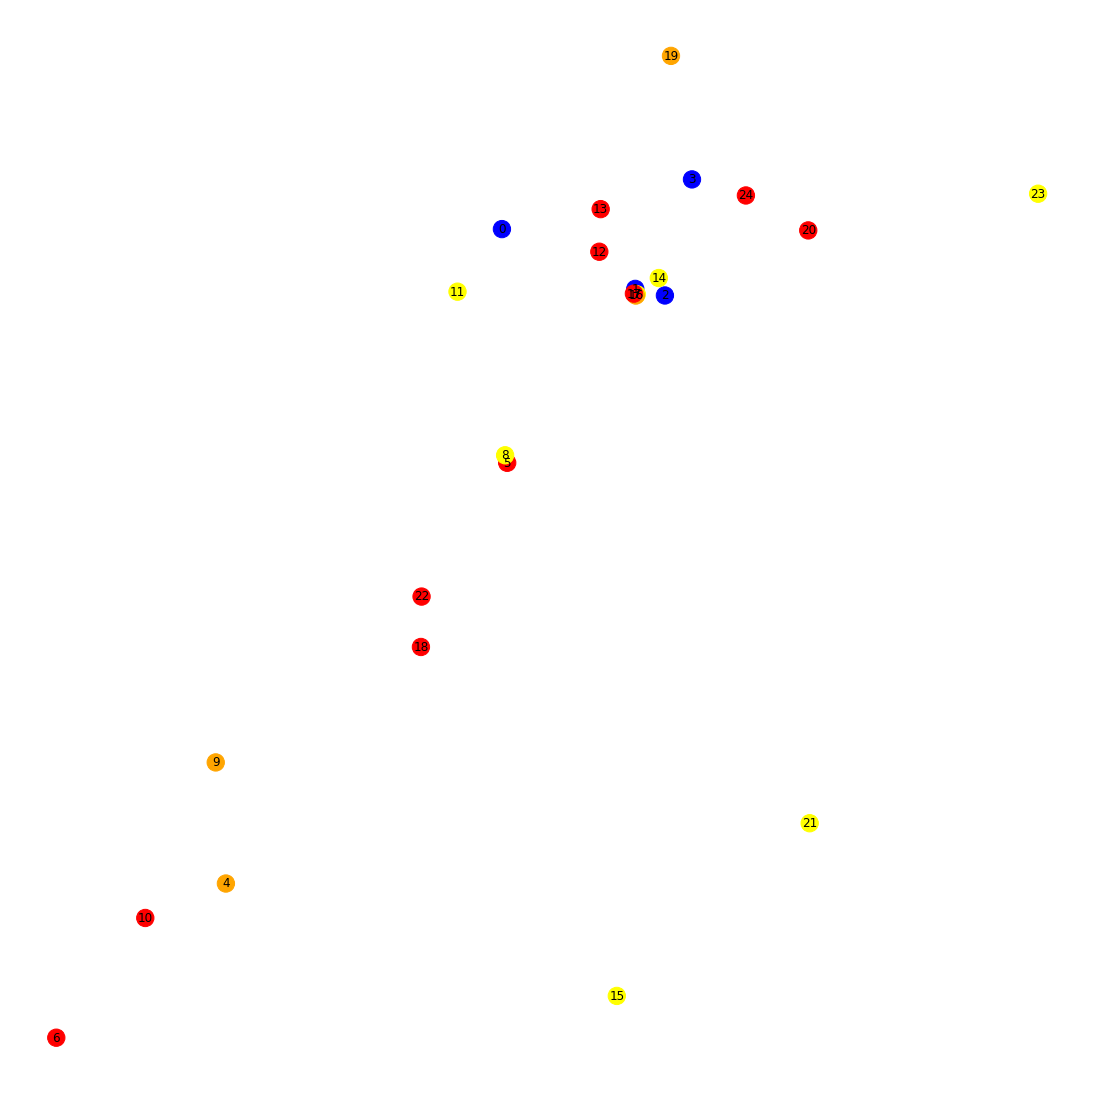

In [2]:
p = Problem("/Users/christophbleyer/Technician-Vehicle-Routing-Optimization/examples/Datasets/")
plt.rcParams["figure.figsize"]=15,15
Graph = p.plot()

# Urgency Assignment via asymetric normalized tansini affinity

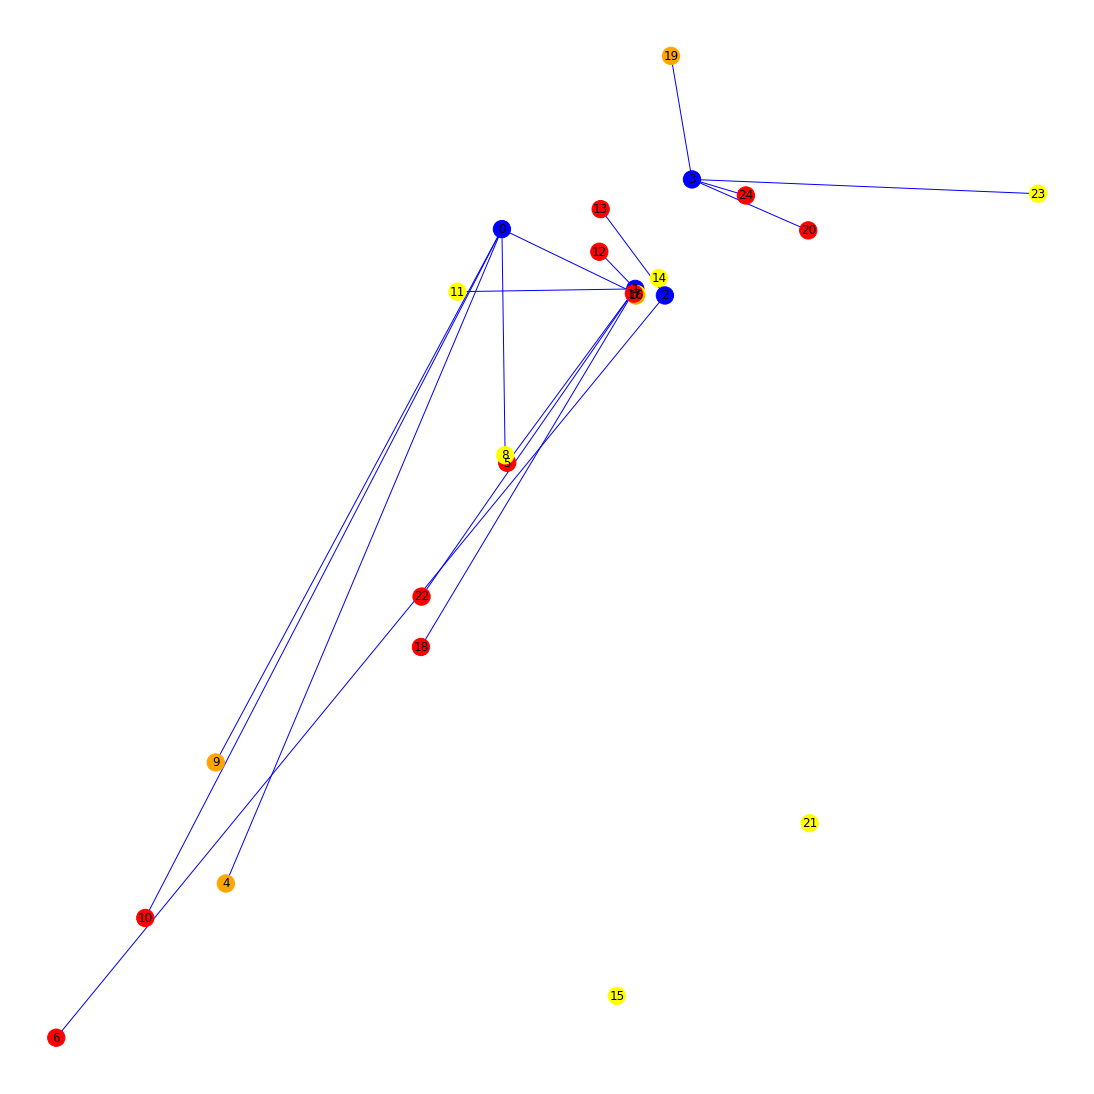

In [3]:
Graph, solution = parallelUrgencyAssignment(p, True)

In [4]:
print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(solution.problem.demand))

Percent custs in holding after clustering 0.14285714285714285


# Parallel Generalized Regret Insertion

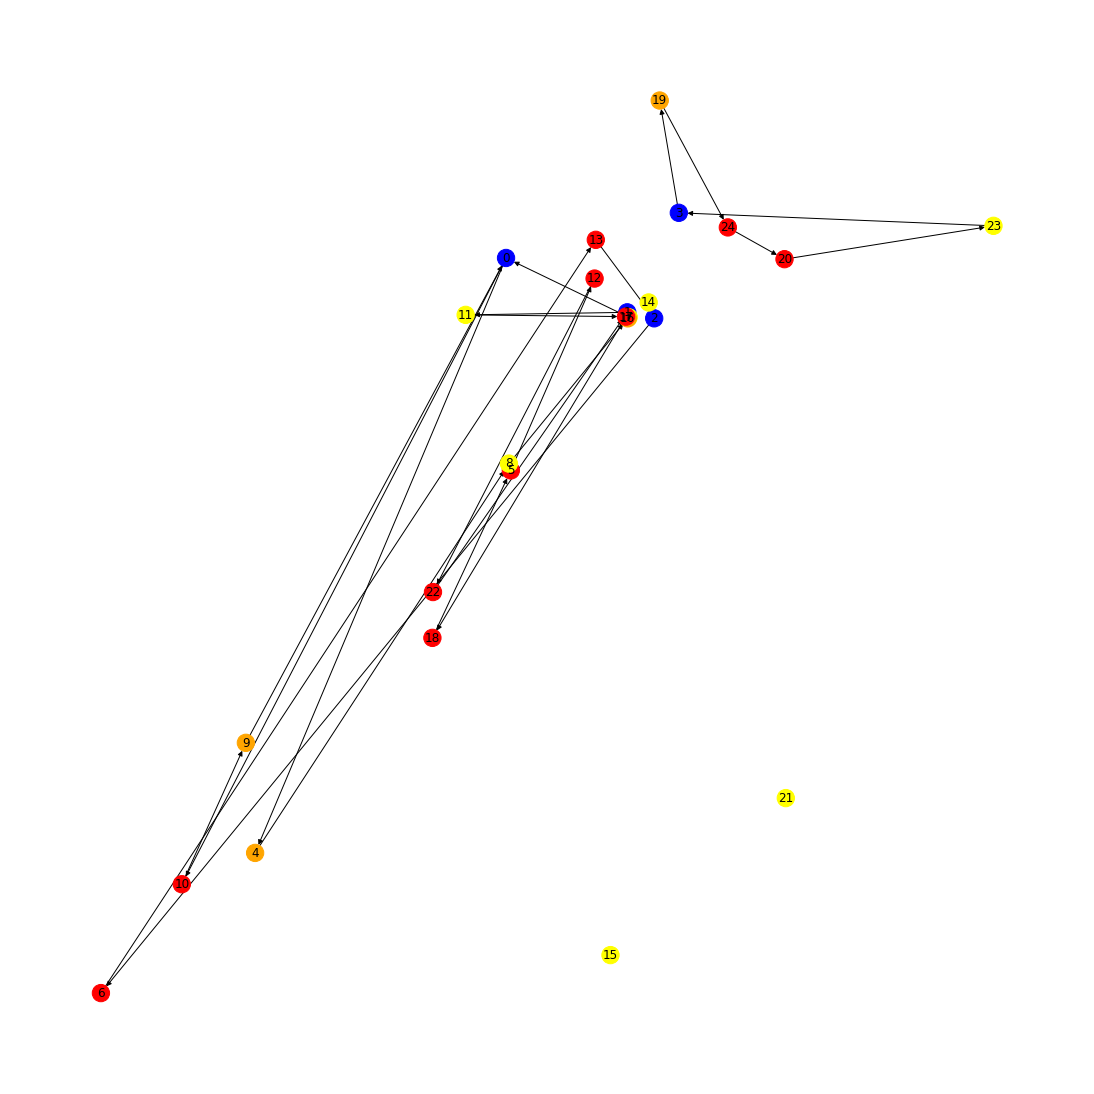

In [5]:
buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [6]:
print("Total objective: ", solution.objective())

print("Percent custs in holding after clustering",  len(solution.unassignedRequests)/len(p.demand))

Total objective:  1292.3394999999996
Percent custs in holding after clustering 0.19047619047619047


# ALNS via Hill Climbing Acceptance

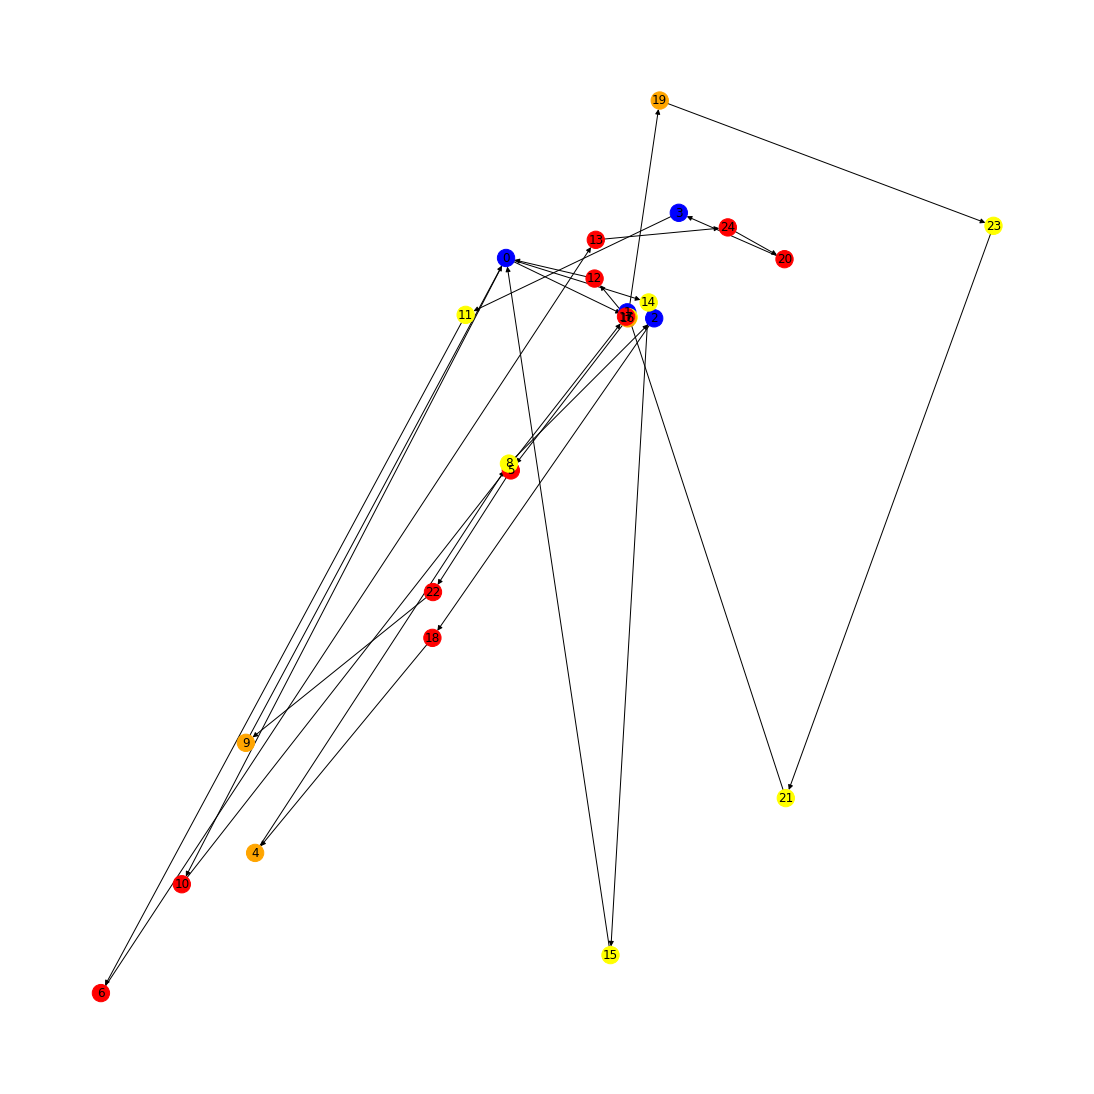

In [25]:
alns = ALNS()
alns.add_destroy_operator(randomRemoval)
alns.add_repair_operator(greedyInsertion)
alns.add_repair_operator(k_regretInsertion)
criterion = HillClimbing()

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()


In [26]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  27.120240000000003
Percent custs in holding after alns 0.0


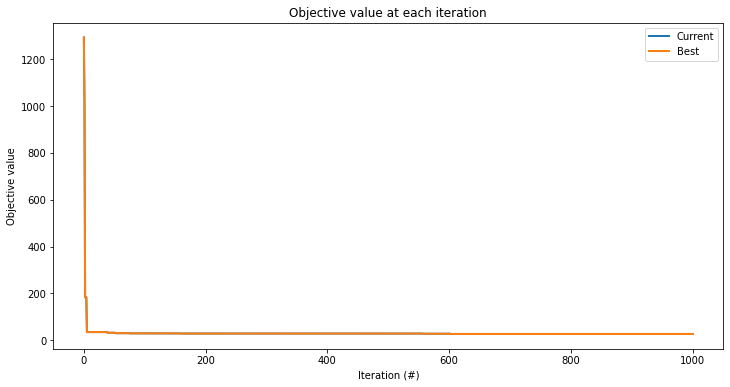

In [27]:
_, ax = plt.subplots(figsize=(12, 6))
result.plot_objectives(ax=ax, lw=2)

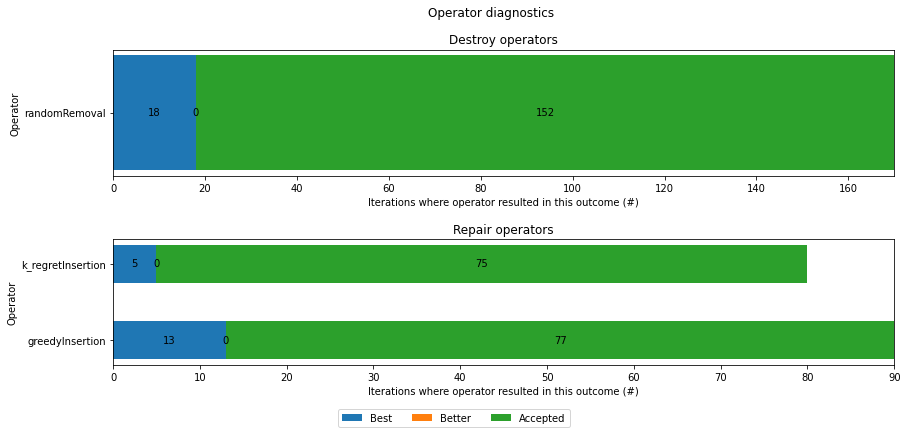

In [10]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

 # ALNS via Simulated Annealing Acceptance

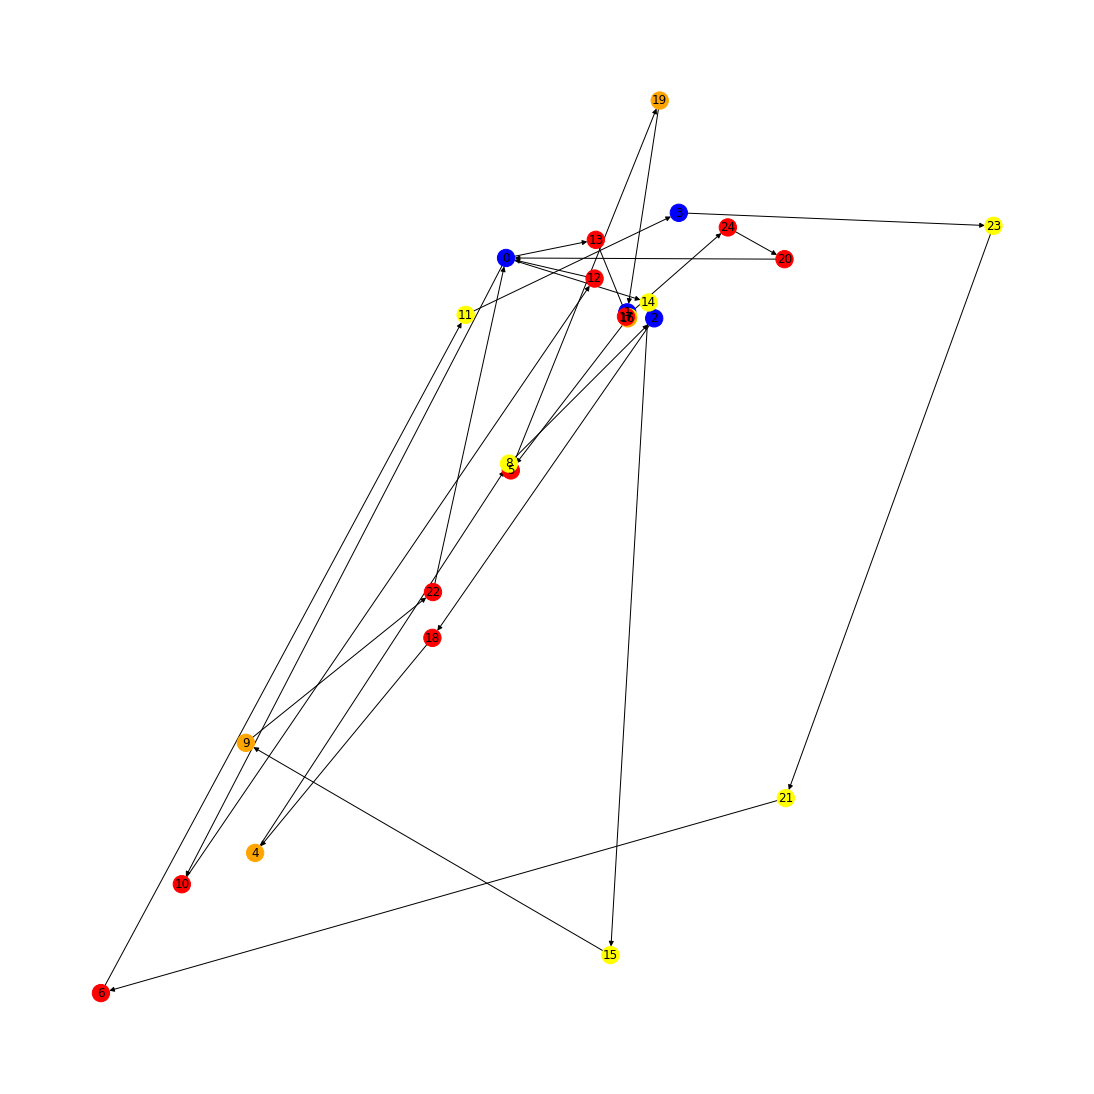

In [28]:
alns = ALNS()
alns.add_destroy_operator(randomRemoval)
alns.add_repair_operator(greedyInsertion)
alns.add_repair_operator(k_regretInsertion)
criterion = SimulatedAnnealing(200000, 10, 5, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.8, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [29]:
print("Total objective: ", optimized.objective())
print("Percent custs in holding after alns",  len(optimized.unassignedRequests)/len(p.demand))

Total objective:  28.927930000000003
Percent custs in holding after alns 0.0


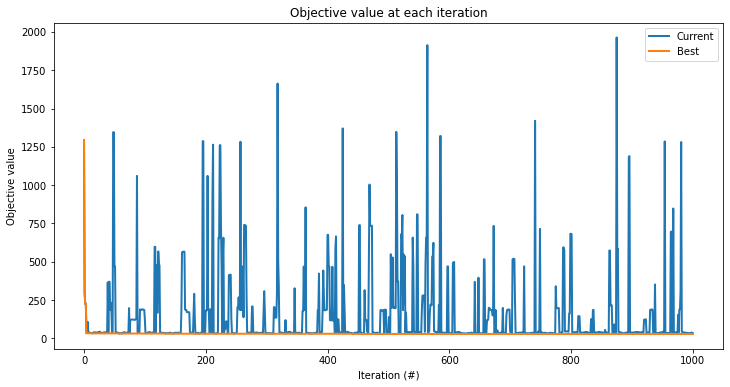

In [30]:
_, ax = plt.subplots(figsize=(12, 6))
result.plot_objectives(ax=ax, lw=2)

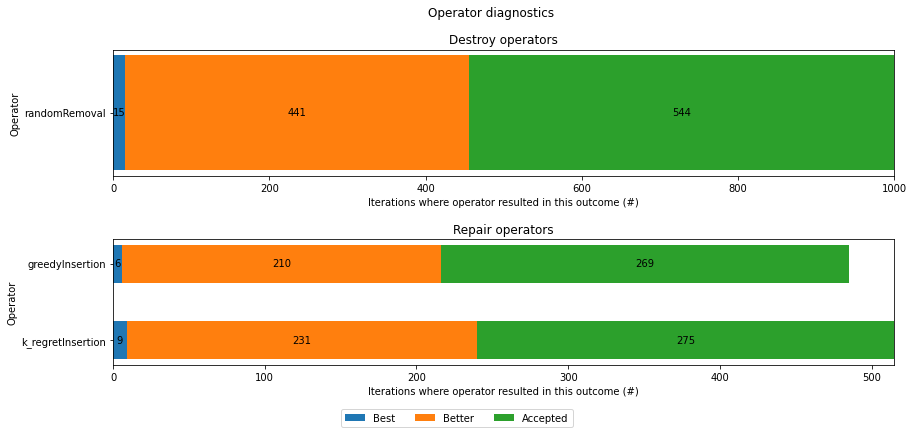

In [14]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])